# Part II - Punt Review
## by David Krejcarek

## Investigation Overview

We From these three graphs we can see that Normal punt type has the highest Hang Time and also the longest kick. The hang time for the Aussie stye is only slightly less then the hang time of Normal. Although the graph doesn show a big difference in the hang time we can see that the difference is with a 0.5 seconds of each other. In reality that 1/2 second wouldn't really be noticed by anyone palying or watching. However, we can see that the Aussie style with a kick length of about 40 yards doesn't get the same kick length as a normal kick wich as a median value of just under 50 yards. The Rugby style is by far the worse form of kicking with the Hang time being almost 1/2 sec less then Normal Style and even worse the average is about 15 yards shorter. I would recommend staying away from that style.

One important note is that the Aussie Style Type actaully results in more Fair Catches, while a normal kick results in significantly more Returns. This is interesting because when we looked at the kick length and hang time they didn't really show a significant difference. To really see what is going on we will need to see what affect the kick length and hang time together affect the play result.

BY splitting the data into the results of Return or Fair catch we can see that although the Hang time of the kicks for both Return and Fair Catches was about 4.5 sec the Fair catch. The kick length shows a different story. Although the hang time is similar we can see that the kick length changes, with a hang times of around 4.5 second the normal style kick has a kick length of about 50 yard to 55 yard, has a higher chance to be returned. While a hang time of 4.5 sec and a kick length of 40 to 45 yards the Aussie-Style has a higher chance of being a fair catch. If the goal would be to not have a return then the recommendation would be for punter to shoot for a high short kick. This makes sense because this gives the gunners the best oppurtunity to get into position to force a Fair Catch call.

One concern would be you are giving the opposing team about 10 yards by kicking it short. Is this going to give the opposing team better field position. As we showed earlier that the average yards per return is usually between 2.5 and 7.5 yards and that 78% of all returns are under 10 yards which would be less than or equal to having the punter kick the punt short to result in a fair catch. This would result in the opposing team being further away from scoring position. Which is the goal of a punt. At this point the recommendation would be for the punter to have a hang time of apprx 4.5 sec and get the ball within the 50 - 55 yard range. To get this it is also recommended that they use a Normal style punt. This sets the team up with the highest chance of success. Which would be difined as the opposing team have field position furthest from the endzone..

## Dataset Overview


There was four datasets **Game** data this contains the over information about the games played through seasons 2018 thru 2020.  The imporant information was the season the game was played in for this ananlysis.  I also used the **Play** data which contains play-level information from each game. The key variables are the type of plays, the result, which includes the lengh of kick and the return length.  The **Player** data that contains player-level information from players that participated in any of the tracking data files. The **PFF Scouting** fil that contains play-level scouting information for each game.  This includes the hang time and style of the punt.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
punt_data = pd.read_csv(os.path.join('data', 'punt_data.csv'))
plays = pd.read_csv(os.path.join('data', 'plays.csv'))

## Types of Punt Results

In [3]:
# Filter to only punt to so we can reduce the data we need to review
play_type = ['Punt']
plays_returnable = plays[plays['specialTeamsPlayType'].isin(play_type)]


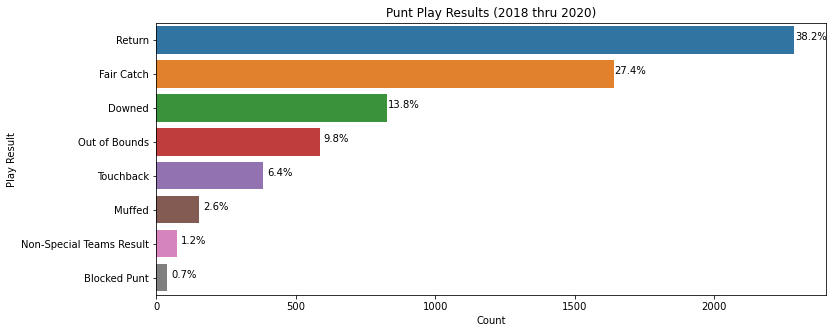

In [4]:
# Plot the type of results
plt.figure(figsize=[12,5])
order = plays_returnable.specialTeamsResult.value_counts().index
type_counts = plays_returnable['specialTeamsResult'].value_counts()
n_plays = plays_returnable.specialTeamsResult.count()


sb.countplot(data = plays_returnable, y = 'specialTeamsResult', order = order)
plt.title('Punt Play Results (2018 thru 2020)')
plt.ylabel('Play Result')
plt.xlabel('Count')

# get the current tick locations and labels
locs, labels = plt.yticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_plays)

    # print the annotation just below the top of the bar
    plt.text(count + 60, loc, pct_string, ha = 'center', color = 'black');

Looking at the type of results that are there for a punt play, the majority of plays result in a retrun.  This is followed by a fair catch.  These two together account 65.6% of all play results.  The next four plays results are Downed, Out of Bounds, Touchback, Muffeg are all related to the punters ability to control the ball.  These do account 32.6% of the plays.  But since we are looking at the strategy of the punt play more then the control then we will look mostly at what leads to a return or a fair catch.  

## Distribution of Punt Length


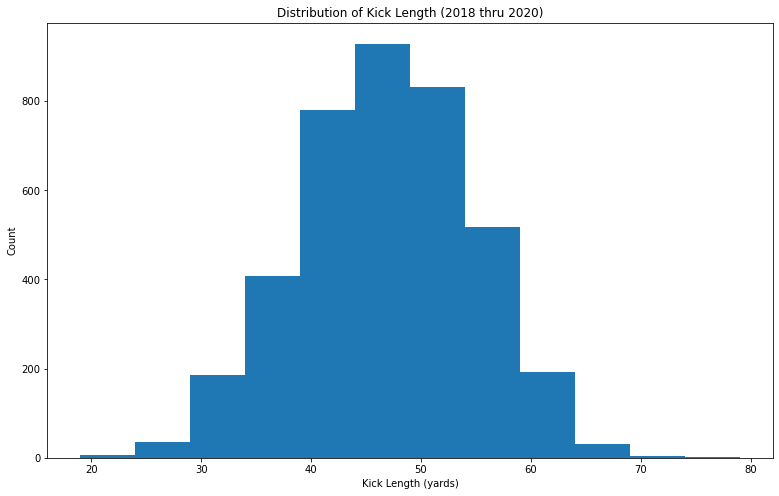

In [5]:
bins = np.arange(punt_data.kickLength.min(), punt_data.kickLength.max() + 5, 5)

plt.figure(figsize=[13,8])
plt.hist(data = punt_data, x = 'kickLength', bins = bins)
plt.title('Distribution of Kick Length (2018 thru 2020)')
plt.xlabel('Kick Length (yards)')
plt.ylabel('Count');

The meadian punt length in yards is areound 45 - 50yards.  We can also see that the distribution of the length is normally distributed.  

## Average Return Yards per Return


In [6]:
# Determine the yards per return average by season
def get_return_data(s, df):
    if s == 'All':
         # Get the data for number of return counts
        punt_return_counts = df.query('specialTeamsPlayType == "Punt"'.format(s)).returnerId.value_counts()
        kickoff_return_counts = df.query('specialTeamsPlayType == "Kickoff"'.format(s)).returnerId.value_counts()
        # get the the series for the total yards
        punt_return_yards = df.query('specialTeamsPlayType == "Punt"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']
        kickoff_return_yards = df.query('specialTeamsPlayType == "Kickoff"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']

        # Create a dictionary for concatations
        data = {'punt_return_yards': punt_return_yards,
                'punt_return_counts': punt_return_counts,
                'kickoff_return_yards': kickoff_return_yards,
                'kickoff_return_counts': kickoff_return_counts}

        # Concat the two series into new datafra,e
        df_returner = pd.concat(data, axis=1) 

        # determine the yards per return
        df_returner['punt_yard_per_return'] = df_returner['punt_return_yards'] / df_returner['punt_return_counts']
        df_returner['kickoff_yard_per_return'] = df_returner['kickoff_return_yards'] /df_returner['kickoff_return_counts']

        return df_returner
    else:
        # Get the data for number of return counts
        punt_return_counts = df.query('season == {} & specialTeamsPlayType == "Punt"'.format(s)).returnerId.value_counts()
        kickoff_return_counts = df.query('season == {} & specialTeamsPlayType == "Kickoff"'.format(s)).returnerId.value_counts()
        # get the the series for the total yards
        punt_return_yards = df.query('season ==  {} & specialTeamsPlayType == "Punt"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']
        kickoff_return_yards = df.query('season == {} & specialTeamsPlayType == "Kickoff"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']

        # Create a dictionary for concatations
        data = {'punt_return_yards': punt_return_yards,
                'punt_return_counts': punt_return_counts,
                'kickoff_return_yards': kickoff_return_yards,
                'kickoff_return_counts': kickoff_return_counts}

        # Concat the two series into new datafra,e
        df_returner = pd.concat(data, axis=1) 

        # determine the yards per return
        df_returner['punt_yard_per_return'] = df_returner['punt_return_yards'] / df_returner['punt_return_counts']
        df_returner['kickoff_yard_per_return'] = df_returner['kickoff_return_yards'] /df_returner['kickoff_return_counts']

        return df_returner

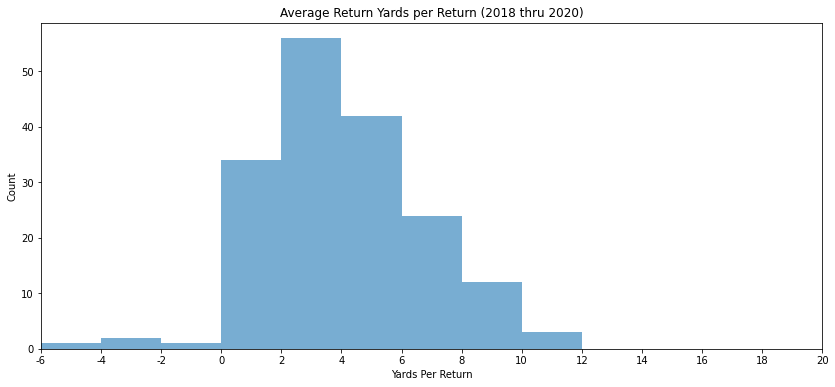

In [7]:
seasons = punt_data.season.value_counts().index
min_x = -6
max_x = 20
step = 2
x_layout = np.arange(min_x, max_x + step, step)

plt.figure(figsize=[14,6])

returner_data = get_return_data('All', punt_data)
 
bins = x_layout
plt.hist(returner_data['punt_yard_per_return'], alpha = .6, label='Punt', bins = bins)
plt.title('Average Return Yards per Return (2018 thru 2020)')
plt.xticks(x_layout, x_layout) 
plt.xlim(min_x, max_x)
plt.xlabel('Yards Per Return')
plt.ylabel('Count');

At first we looked at the the distribution of return yards which results in a not very informative graph.  So I worked the data into the average yard of return.  To do this I figured out the total number of punt returns and the total yards of a specific returner.  Dividing the total yards by the total number of returns we can get the average return for a returner.  IThis gives us a better look at the what type of return yards a player will have each time he returns.  There is always a chance that a return will go longer than his average.  For this we can see that the average return yards was about 5 yards.  It is also important to notice that highest average yards per carry was between 10 and 12 yards.  While almost all averages were under 10 yards.  


## Distribution of Hang Time

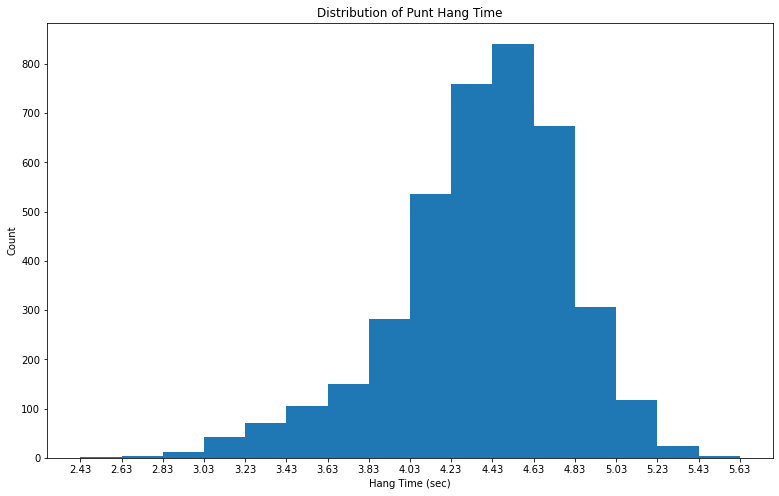

In [8]:
plt.figure(figsize=[13,8])
bins = np.arange(punt_data.hangTime.min(), punt_data.hangTime.max() + .2, .2)

plt.hist(punt_data.hangTime, bins=bins) 
plt.title('Distribution of Punt Hang Time')
plt.xticks(bins)
plt.xlabel('Hang Time (sec)')
plt.ylabel('Count');

The hang times for punts was between 4.43 and 4.63 seconds.  This is distribution is also skewed the left, which makes sense.  Not ever punt will need to have the same hang time, based on where on the field the punt is taking place.  The closer the punt is to the opposing teams end zone then the kick will have to be lower to make sure it stays the field of play.  

## Punt Styles

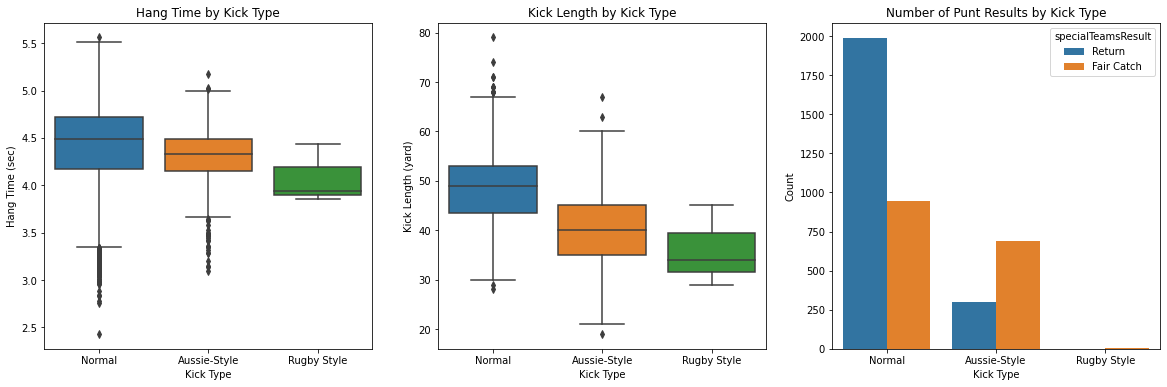

In [9]:
plt.figure(figsize=[20,6])

plt.subplot(1, 3, 1)
# Plot the bar plot for the kick type
kick_styles = {'N': 'Normal',
               'A': 'Aussie-Style',
               'R': 'Rugby Style'}
# determine new tick values 
x_counts = punt_data.kickType.value_counts()
x_order = list(x_counts.index)
x_labels = []
for x in x_order:
    x_labels.append('{}'.format(kick_styles[x]))
      
sb.boxplot(data = punt_data, x = 'kickType', y = 'hangTime', order=x_order)
plt.title('Hang Time by Kick Type')
plt.xlabel('Kick Type')
plt.ylabel('Hang Time (sec)')
plt.xticks(range(0, len(x_order)), x_labels);

plt.subplot(1, 3, 2)
sb.boxplot(data=punt_data, x = 'kickType', y = 'kickLength', order = x_order)
plt.title('Kick Length by Kick Type')
plt.xlabel('Kick Type')
plt.ylabel('Kick Length (yard)')
plt.xticks(range(0, len(x_order)), x_labels);

plt.subplot(1, 3, 3)
sb.countplot(data=punt_data, x = 'kickType', hue = 'specialTeamsResult')
plt.title('Number of Punt Results by Kick Type')
plt.xlabel('Kick Type')
plt.ylabel('Count')
plt.xticks(range(0, len(x_order)), x_labels);

In the NFL there are three types of punt styles that are commonly used.  The normal style, the Aussie-Style, and the Rugby style.  We see that most common is the normal style followed by the Aussie-style punt.  The Rugby style while used is used very rarely.  It is intresting to see that the Normal stlye typically results in a Returnable punt, while the Aussie-style results in more fair catch plays.  

Looking at the hang time of each of the styles we can see that the Normal style gives the punter the best hang time, with a median of 4.5 sec.  The Aussie-Style has a slightly smaller hang time with around 4.3 seconds.  We can also see that the distribution is smaller with the min and max coming around 3.6 sec and 5 seconds.  While the Normal min and max values are 3.4 to 5.5 seconds.  This can lead one to beleive that the Aussie-style actually produces a more consistant hang time.  But even though there seems to be a big difference graphically the real world differance would be consider negliable.  A half seccond of hang time would be hard for anyone playing or watching to notice.  

The kick length though we can see that the normal style has a median length of just under 50 yards whil the Aussie-style had a median length of around 40 yards.  This is pretty significant differnce.  10 yards doesn't seem like a lot but thinking that the field is 100 yards long a 10 yard difference is 10% of the field of play.  Another way that one could look at it is that the opposing team needs to get 10 yards for a first down so essintaling if you loose 10 yards in length you are giving the opposing team a free first down before their offense has a chance to get on the field.  

## Hang Time and Kick Length Versus Punt Result



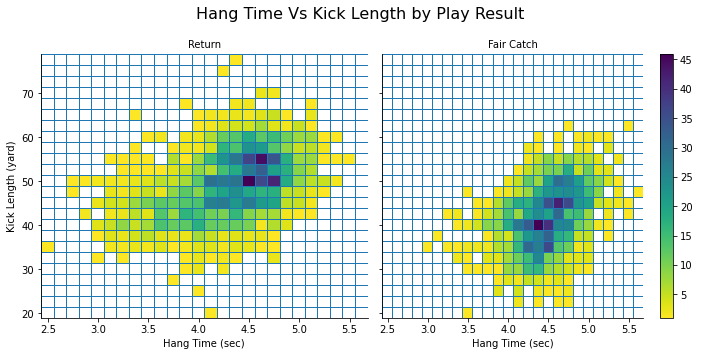

In [10]:
# plot to see if there is a corelation between hang time and kick length
x_bins = np.arange(punt_data.hangTime.min(), punt_data['hangTime'].max() + 0.125, 0.125)
y_bins = np.arange(punt_data.kickLength.min(), punt_data.kickLength.max() + 2.5, 2.5)

# plot the hang time versus kick length split among Return and Fair Catch.  With the amoutn of data two seperate heat maps would make more since
g = sb.FacetGrid(data = punt_data, col = 'specialTeamsResult', height=5, aspect = 1)
g.map(plt.hist2d, 'hangTime', 'kickLength', cmin=.5, cmap='viridis_r', bins = [x_bins, y_bins])
g.fig.subplots_adjust(top  = 0.85)
g.fig.suptitle('Hang Time Vs Kick Length by Play Result', fontsize=16)
g.set_titles("{col_name}") # use this argument literally
g.set_axis_labels('Hang Time (sec)', 'Kick Length (yard)')
plt.colorbar()
g.add_legend();

Splitting the data into the results of Return or Fair catch we can see that although the Hang time of the kicks for both Return and Fair Catches was about 4.5 sec the Fair catch could might be slightly.  The kick length shows a different  Aloough the hang time is similar we can see that the kick length changes, with a hang time of around 4.5 second and a about 50 yard to 55 yard, has a higher chance to be returned.  While a kick length of 40 to 45 yards has a higher chance of being downed as a fair catch.  If the goal would be to not have a return then the recommendation would be for punter to shoot for a high short kick.  This makes sense because this gives the gunners the best oppurtunity to get into position to force a Fair Catch call.  

One concern would be you are giving the opposing team about 10 yards by kicking it short.  Is this going to give the opposing team better field position.  As we showed earlier that the average return is usually between 2.5 and 7.5 yards and 78% of all returns are under 10 yards which would be less than or equal to having the punter kick the punt short.   At this point the recommendation would be for the punter to have a hang time og apprx 4.5 sec and get the ball within the 50 - 55 yard range.  This sets the team up with the highest chance of success.  Which would be difined as the opposing team have field position furthest from the endzone.  

In [11]:
!jupyter nbconvert punt_results.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook punt_results.ipynb to slides
[NbConvertApp] Writing 700295 bytes to punt_results.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\dkrejcarek\Anaconda3\envs\Data Analysis\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\dkrejcarek\Anaconda3\envs\Data Analysis\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\dkrejcarek\Anaconda3\envs\Data Analysis\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\dkrejcarek\Anaconda3\envs\Data Analysis\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\dkrejcarek\Anaconda3\envs\Data Analysis\lib\site-packages\nbconvert\n